<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [12]:
# !kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

401 - Unauthorized - Unauthenticated


In [15]:
import zipfile
zip_data = zipfile.ZipFile('/content/archive (3).zip')
zip_data.extractall('/content')
zip_data.close()

In [16]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.duplicated().sum()

0

In [21]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
df2=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [23]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df2.shape

(10000, 11)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
num_cols=df2.select_dtypes(include=['int64','float64'])
num_cols.columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

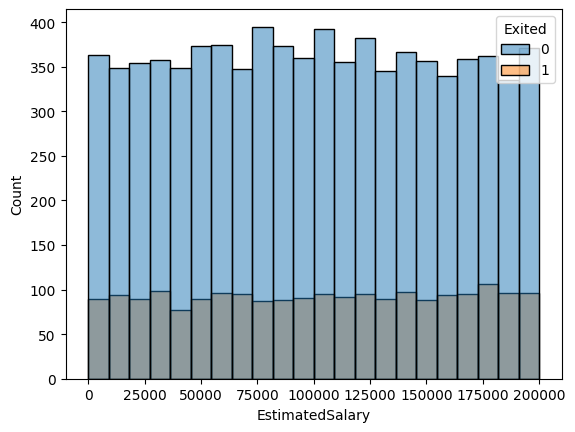

In [58]:
sns.histplot(df2,x='EstimatedSalary',hue='Exited')
plt.show()


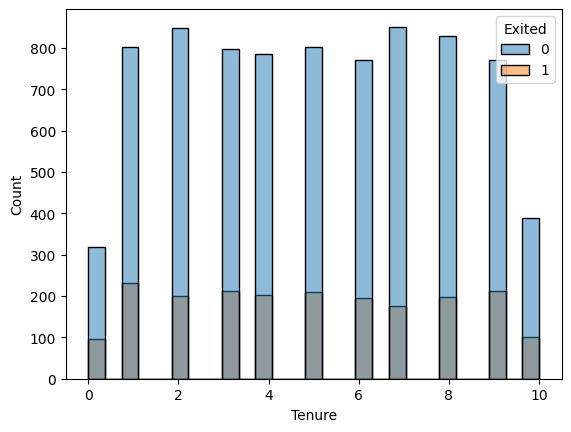

In [57]:
sns.histplot(df2,x='Tenure',hue='Exited')
plt.show()


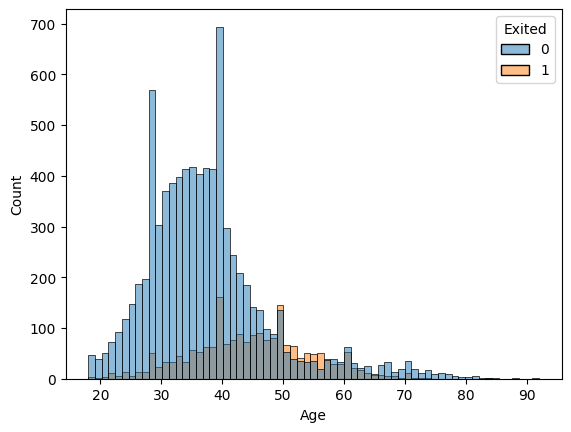

In [56]:
sns.histplot(df2,x='Age',hue='Exited')
plt.show()


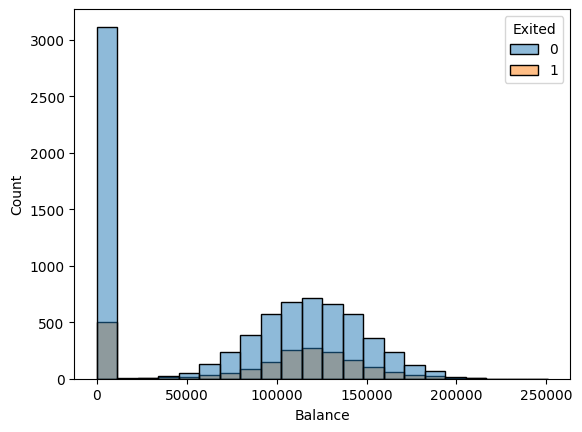

In [55]:
sns.histplot(df2,x='Balance',hue='Exited')
plt.show()

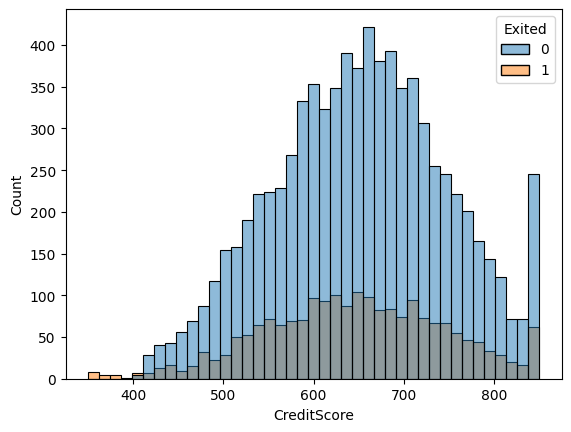

In [54]:
sns.histplot(df2,x='CreditScore',hue='Exited')
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

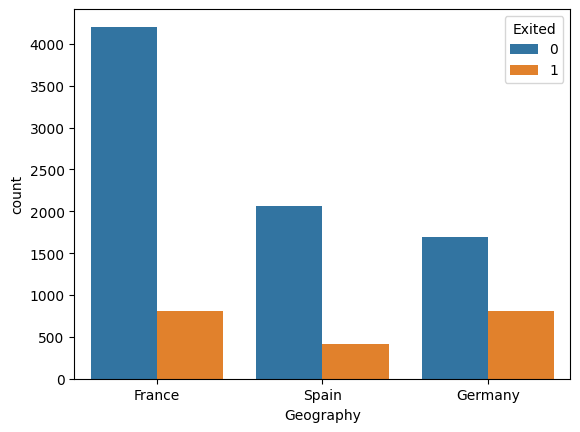

In [69]:
geo_wise= df2.groupby('Exited')['Geography']

sns.countplot(df2,x='Geography',hue='Exited')

In [77]:
pct = list(df2[df2.Exited == 1].Geography.value_counts().values/len(df2)*100)
vals = list(df2[df2.Exited == 1].Geography.value_counts().values)
country = list(df2[df2.Exited == 1].Geography.value_counts().index)
country_df = {'Country':country,'count':vals,'percent':pct}
exited_country_wise = pd.DataFrame(country_df)
exited_country_wise

,Country,count,percent
0,Germany,814,8.14
1,France,810,8.10
2,Spain,413,4.13


In [78]:
pct = list(df2[df2.Exited == 0].Geography.value_counts().values/len(df2)*100)
vals = list(df2[df2.Exited == 0].Geography.value_counts().values)
country = list(df2[df2.Exited == 0].Geography.value_counts().index)
country_df = {'Country':country,'count':vals,'percent':pct}
not_exited_country_wise = pd.DataFrame(country_df)
not_exited_country_wise

,Country,count,percent
0,France,4204,42.04
1,Spain,2064,20.64
2,Germany,1695,16.95


Customer churn is max in germany and minimum in spain


In [79]:
df2['CreditCardOwnerTenure'] = df2.HasCrCard * df2.Age
df2['RelationshipValue'] = df2.Tenure * df2.Balance

In [81]:
df=pd.get_dummies(df2,columns=['Geography','Gender'],drop_first=True)

In [82]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditCardOwnerTenure,RelationshipValue,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,42,0.00,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,83807.86,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,42,1277286.40,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0.00,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,43,251021.64,0,1,0


In [97]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'CreditCardOwnerTenure',
       'RelationshipValue', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

In [98]:
x=df.drop(columns=['Exited'],axis=1)
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [99]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [101]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [104]:
model= Sequential()

model.add(Dense(13,activation='relu',input_dim=13))
model.add(Dense(13,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 13)                182       
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 378 (1.48 KB)
Trainable params: 378 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
print(x_train_sc.shape)


(8000, 13)


In [107]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train_sc,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5290 - accuracy: 0.7936 - val_loss: 0.4781 - val_accuracy: 0.7887
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4340 - accuracy: 0.8163 - val_loss: 0.4434 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8223 - val_loss: 0.4260 - val_accuracy: 0.8119
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8341 - val_loss: 0.4128 - val_accuracy: 0.8281
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8478 - val_loss: 0.4002 - val_accuracy: 0.8338
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8533 - val_loss: 0.3894 - val_accuracy: 0.8369
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8569 - val_loss: 0.3820 - val_accuracy: 0.8413

In [108]:
model.layers[0].get_weights()

[array([[ 3.23541202e-02,  1.44656122e-01,  1.62873976e-02,
         -6.79094195e-02,  4.59225737e-02,  4.39466834e-01,
         -3.04140776e-01,  1.38074890e-01, -3.06586802e-01,
         -1.14799283e-01,  4.26616549e-01, -6.68572962e-01,
         -6.77219808e-01],
        [-5.65840423e-01, -8.42291355e-01, -2.49228954e-01,
          2.15872049e-01,  1.19175887e+00,  6.43462002e-01,
          3.26128304e-01, -3.22228402e-01,  3.33312660e-01,
          2.04108134e-01, -2.45307982e-01, -4.98367637e-01,
          5.14110565e-01],
        [-1.90710947e-01, -2.29588270e-01, -6.88908219e-01,
         -4.70762044e-01,  7.70468637e-03, -2.06624553e-01,
          4.19593677e-02, -1.37649655e-01,  8.73817563e-01,
         -1.18029237e-01,  2.46540025e-01, -2.73299754e-01,
          2.06849232e-01],
        [ 6.25192642e-01,  1.58337697e-01, -2.39509866e-01,
          3.57845426e-01,  1.16424456e-01,  1.45942897e-01,
         -4.10321891e-01, -3.69811982e-01,  2.41378471e-01,
          2.8185820

In [109]:
y_log=model.predict(x_test_sc)

63/63 [==============================] - 0s 1ms/step


In [110]:
y_pred=np.where(y_log>0.5,1,0)

In [111]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.842

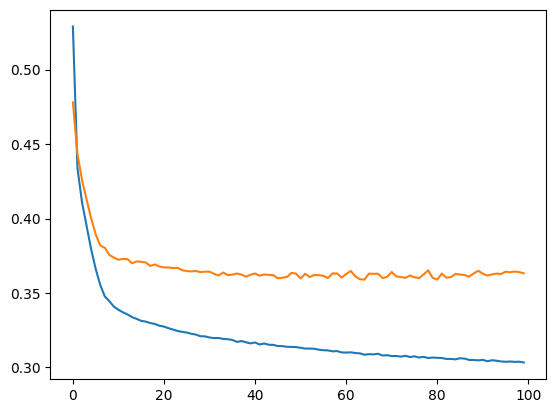

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

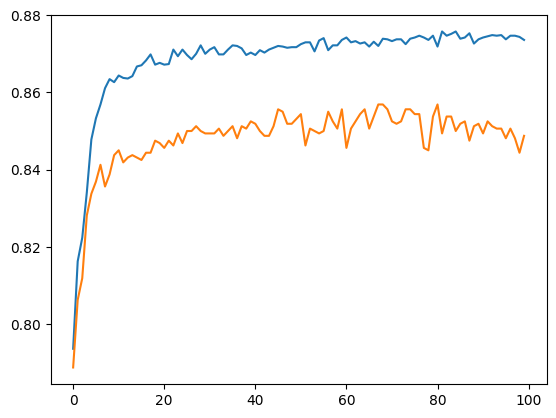

In [114]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])